In [4]:
import tensorflow as tf 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt

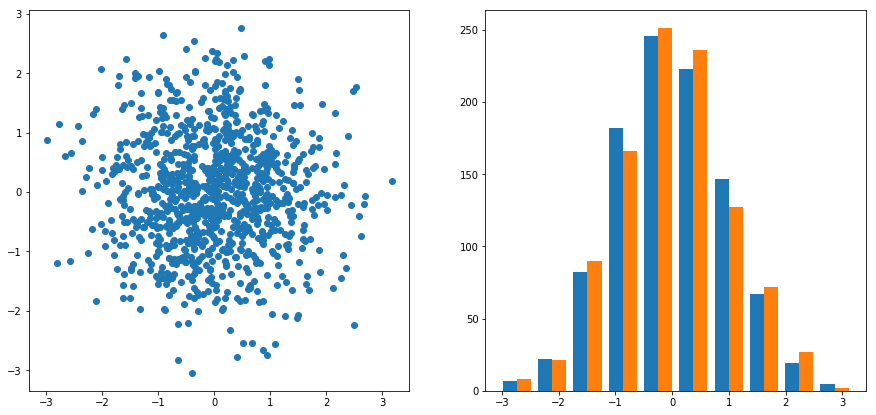

In [21]:
# 0. import random data and play around
np.random.seed(0)
data = np.random.normal(size=(1000,2))
def show_hist(data):
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    plt.scatter(data[:,0],data[:,1])
    plt.subplot(122)
    plt.hist(data)
    plt.show()
show_hist(data)

6984.180116412984
-6.439293542825908e-15


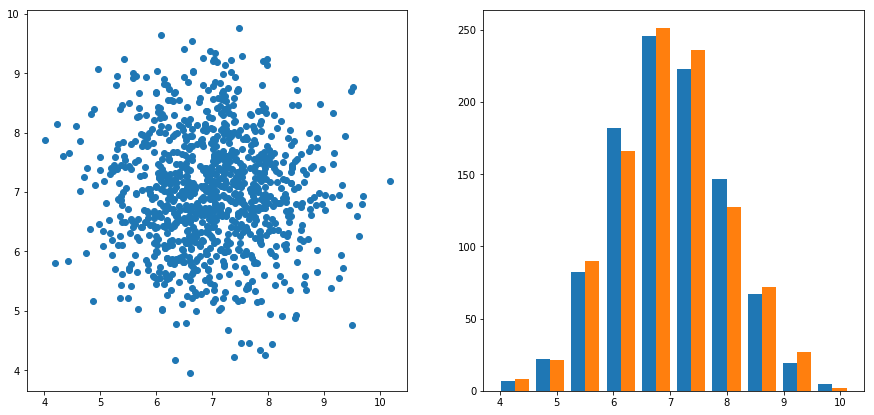

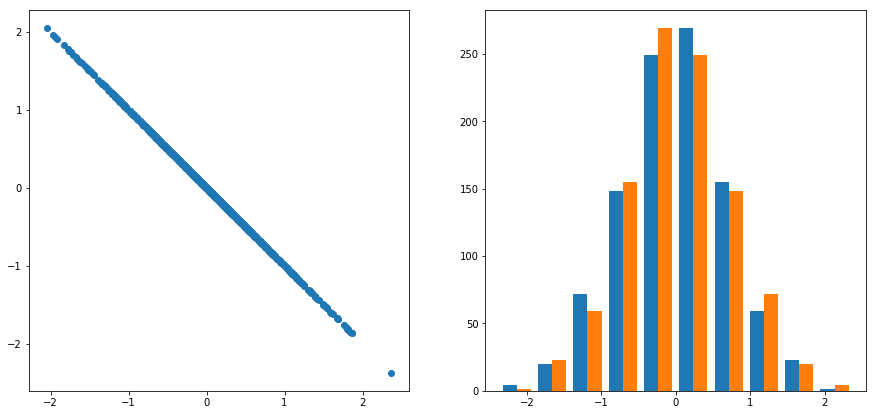

In [28]:
# centering
def center(X):
    """
     shift the row-wise mean to 0
    """
    centered = X - np.mean(X, axis=1)[:,None]
    return centered
data_shift = data + 7
data_cen   = center(data_shift)
print(data_shift.mean(1).sum())
print(  data_cen.mean(1).sum())
show_hist(data_shift); show_hist(data_cen)

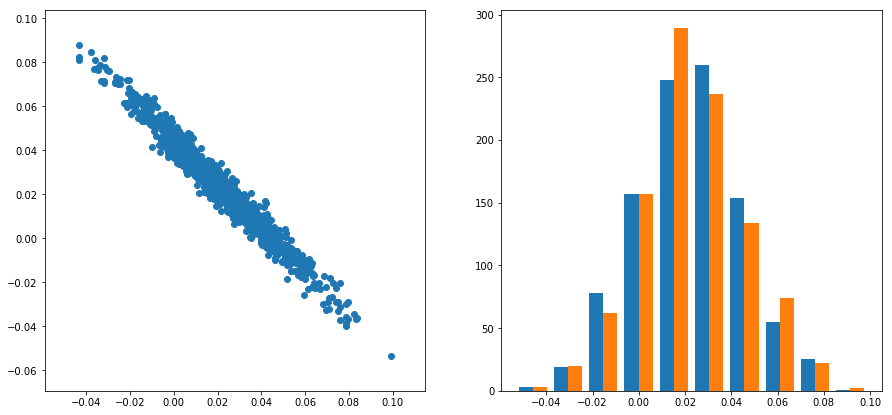

In [31]:
# play with whiten 
def whiten(X, zca=True, red_dim=None):
    if zca:
        # equivalent to taking U instead of V
        Y = np.transpose(X)
        N, p = Y.shape
        Y = Y / np.sqrt(N - 1)
        U, s, V = np.linalg.svd(Y, full_matrices=False)

        # This is dim reduction        
        if not red_dim:
            S = np.diag(s)
            E = np.transpose(V)
        else:
            order_eigen = np.argsort(-s)
            s_ordered_red = s[order_eigen][:red_dim]
            S = np.diag(s_ordered_red)
            V_ordered_red = V[order_eigen][:red_dim]
            E = np.transpose(V_ordered_red)

        R = np.dot(E, np.dot(np.linalg.inv(S), np.transpose(E)))
        R_inv = np.linalg.inv(R)
        X_whitened = np.dot(R, X)

    else:
        X_t = X
        covarianceMatrix = X_t.dot(X_t.T) / X.shape[1]
        s, E = np.linalg.eig(covarianceMatrix)
        s = s.real
        E = E.real
        order_eigen = np.argsort(-s)
        s_ord_red = s[order_eigen][:red_dim]
        E_ord_red = (E.T[order_eigen][:red_dim]).T
        E = E_ord_red
        S = (np.diag(s_ord_red ** (-0.5)))
        R = np.dot(S, E.T)
        R_inv = np.dot(E, S)
        X_whitened = np.dot(R, X_t)

    return X_whitened, R, R_inv
data_white = whiten(data_shift)
show_hist(data_white[0])

In [19]:
! git add . 
! git commit -m 'from mac'
! git push 

[master 6ff568e8] from mac
 2 files changed, 310 insertions(+), 2 deletions(-)
Counting objects: 7, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 108.34 KiB | 13.54 MiB/s, done.
Total 7 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   515ab828..6ff568e8  master -> master
